In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from math import floor

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [10]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

dcmls = lambda x : -int(floor(np.log10(abs(x))))
lineal_a = lambda x,a : a*x
lineal_b = lambda x,b : -x + b
lineal = lambda x,a,b : a*x+b
hyp_f = lambda x,a : 1/(1/x + a)

La distancia focal es de (21.665144880275122 ± 1.2824692811677702e-06) cm
50.137804162777286
0.9965218512549776


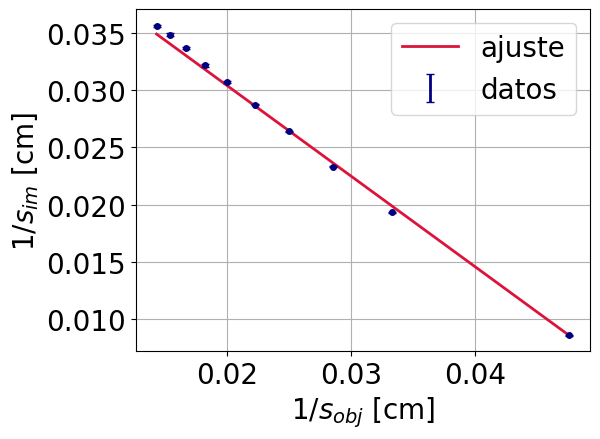

0.3510991206544165
0.9975510648125722


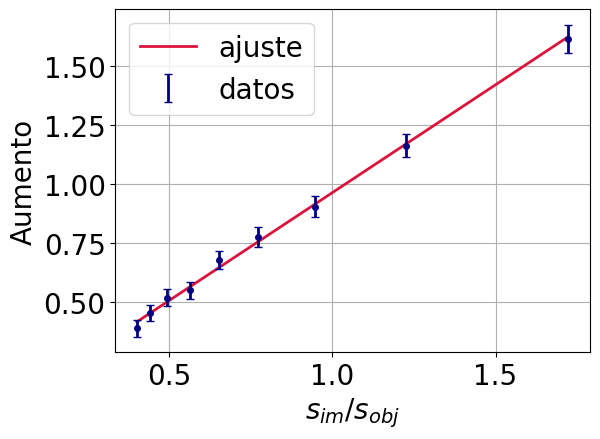

In [29]:
data1a = np.loadtxt('distancias y altura lente 1.csv',delimiter=',',unpack=True,skiprows=1)
s1a,s_im1a,err_s1a,err_s_im1a,anch1 = data1a
err_anch1 = np.zeros_like(anch1) + 0.1

s_im1a = s_im1a-s1a

order1a = np.argsort(s1a)
s1a = s1a[order1a]
s_im1a = s_im1a[order1a]
err_s1a = err_s1a[order1a]
err_s_im1a = err_s_im1a[order1a]
anch1 = anch1[order1a]

u1a = 1/s1a
err_u1a = err_s1a/s1a**2
v1a = 1/s_im1a
err_v1a = err_s_im1a/s_im1a**2

pars1a,cov1a = cf(lineal,u1a,v1a,sigma=err_v1a,absolute_sigma=True,p0=[1,1/20])
a1a,b1a = pars1a
err_b1a = cov1a[1,1]
f1 = 1/b1a
err_f1 = err_b1a/b1a**2
x_adj1a = np.linspace(min(u1a),max(u1a),100)
y_adj1a = lineal(x_adj1a,a1a,b1a)

print(f'La distancia focal es de ({f1} ± {err_f1}) cm')
print(chi2_red(v1a,err_v1a,u1a,lineal,pars1a))
print(r2(v1a,u1a,lineal,pars1a))

plt.plot(x_adj1a,y_adj1a,'crimson',label='ajuste',zorder=1)
plt.errorbar(u1a,v1a,yerr=err_v1a,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(u1a,v1a,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$1/s_{obj}$ [cm]')
plt.ylabel(r'$1/s_{im}$ [cm]')
plt.legend()
plt.savefig('im_obj1.png')
plt.show()

anch01 = 3.1
err_anch01 = 0.1
M1 = anch1/anch01
err_M1 = np.sqrt((err_anch1/anch01)**2+(anch1*err_anch01/anch01**2)**2)

S1 = s_im1a/s1a

order1aa = np.argsort(S1)
S1 = S1[order1aa]
M1 = M1[order1aa]
err_M1 = err_M1[order1aa]

pars1b,cov1b = cf(lineal,S1[:-1],M1[:-1],sigma=err_M1[:-1],absolute_sigma=True)
a1b,b1b = pars1b
x_adj1b = np.linspace(min(S1[:-1]),max(S1[:-1]),100)
y_adj1b = lineal(x_adj1b,a1b,b1b)

print(chi2_red(M1[:-1],err_M1[:-1],S1[:-1],lineal,pars1b))
print(r2(M1[:-1],S1[:-1],lineal,pars1b))

plt.plot(x_adj1b,y_adj1b,'crimson',label='ajuste',zorder=1)
plt.errorbar(S1[:-1],M1[:-1],yerr=err_M1[:-1],fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(S1[:-1],M1[:-1],c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$s_{im}/s_{obj}$')
plt.ylabel('Aumento')
plt.legend()
plt.savefig('aumento1.png')

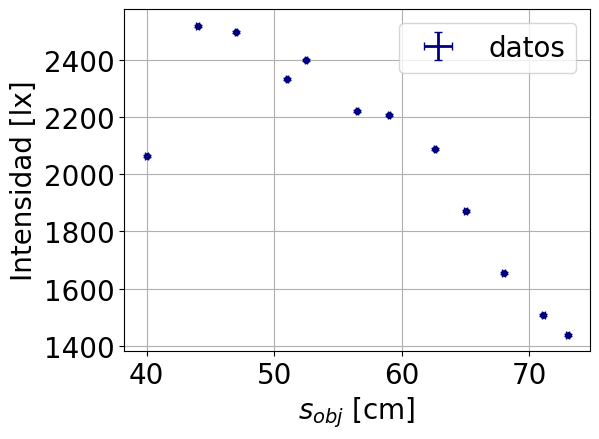

In [ ]:
data1b = np.loadtxt('intensidad lente 1.csv',delimiter=',',unpack=True,skiprows=1)
s1b,s_im1b,i1,err_i1 = data1b
err_sb = np.zeros_like(s1b) + 0.1
ruido = 3.6

order1b = np.argsort(s1b)
s1b = s1b[order1b]
s_im1b = s_im1b[order1b]
i1 = i1[order1b]
err_i1 = err_i1[order1b]

for i in range(len(err_i1)):
    if err_i1[i] < ruido:
        err_i1[i] = ruido

plt.errorbar(s1b,i1,yerr=err_i1,xerr=err_sb,fmt='None',ecolor='Navy',label='datos',zorder=2)
plt.scatter(s1b,i1,c='navy')
plt.grid()
plt.xlabel(r'$s_{obj}$ [cm]')
plt.ylabel('Intensidad [lx]')
plt.legend()
plt.savefig('intensidad1.png')

La distancia focal es de (6.991944016998829 ± 7.034674951565492e-05) cm
6.456513150957805
0.9917286318234887


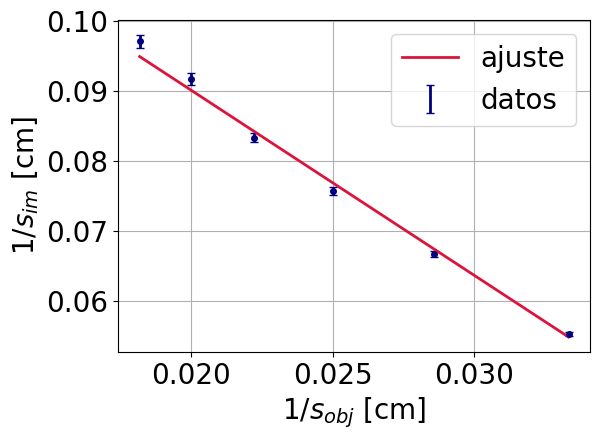

0.997092335016712
0.9763723079871587


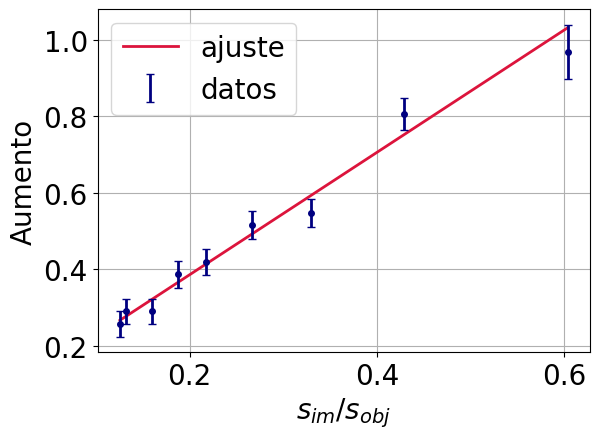

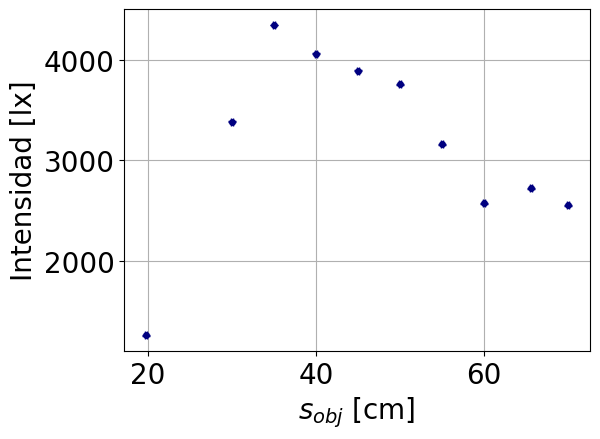

In [51]:
data2 = np.loadtxt('lente 2.csv',delimiter=',',unpack=True,skiprows=1)
s2,s_im2,err_s2,i2,err_i2,anch2,err_anch2 = data2

order2 = np.argsort(s2)
s2 = s2[order2]
s_im2 = s_im2[order2]
err_s2 = err_s2[order2]
i2 = i2[order2]
err_i2 = err_i2[order2]
anch2 = anch2[order2]
err_anch2 = err_anch2[order2]

u2 = 1/s2[1:-3]
err_u2 = err_s2[1:-3]/s2[1:-3]**2
v2 = 1/s_im2[1:-3]
err_v2 = err_s2[1:-3]/s_im2[1:-3]**2

pars2a,cov2a = cf(lineal,u2,v2,sigma=err_v2,absolute_sigma=True,p0=[1,15])
a2a,b2a = pars2a
err_b2a = cov2a[1,1]
f2 = 1/b2a
err_f2 = err_b2a/b2a**2
x_adj2a = np.linspace(min(u2),max(u2),100)
y_adj2a = lineal(x_adj2a,a2a,b2a)

print(f'La distancia focal es de ({f2} ± {err_f2}) cm')
print(chi2_red(v2,err_v2,u2,lineal,pars2a))
print(r2(v2,u2,lineal,pars2a))

plt.plot(x_adj2a,y_adj2a,'crimson',label='ajuste',zorder=3)
plt.errorbar(u2,v2,yerr=err_v2,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(u2,v2,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$1/s_{obj}$ [cm]')
plt.ylabel(r'$1/s_{im}$ [cm]')
plt.legend()
plt.savefig('im_obj2.png')
plt.show()

anch02 = 3.1
err_anch02 = 0.1
M2 = anch2/anch02
err_M2 = np.sqrt((err_anch2/anch02)**2+(anch2*err_anch02/anch02**2)**2)

S2 = s_im2/s2

order2aa = np.argsort(S2)
S2 = S2[order2aa]
M2 = M2[order2aa]
err_M2 = err_M2[order2aa]

S2 = S2[:-1]
M2 = M2[:-1]
err_M2 = err_M2[:-1]

pars2b,cov2b = cf(lineal,S2,M2,sigma=err_M2,absolute_sigma=True)
a2b,b2b = pars2b
x_adj2b = np.linspace(min(S2),max(S2),100)
y_adj2b = lineal(x_adj2b,a2b,b2b)

print(chi2_red(M2,err_M2,S2,lineal,pars2b))
print(r2(M2,S2,lineal,pars2b))

plt.plot(x_adj2b,y_adj2b,'crimson',label='ajuste',zorder=1)
plt.errorbar(S2,M2,yerr=err_M2,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(S2,M2,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$s_{im}/s_{obj}$')
plt.ylabel('Aumento')
plt.legend()
plt.savefig('aumento2.png')
plt.show()


for i in range(len(err_i2)):
    if err_i2[i] < ruido:
        err_i2[i] = ruido

plt.errorbar(s2,i2,yerr=err_i2,xerr=err_s2,fmt='None',ecolor='Navy',label='datos',zorder=2)
plt.scatter(s2,i2,c='navy')
plt.grid()
plt.xlabel(r'$s_{obj}$ [cm]')
plt.ylabel('Intensidad [lx]')
plt.savefig('intensidad2.png')

250.67787815443094
0.9997971164171676


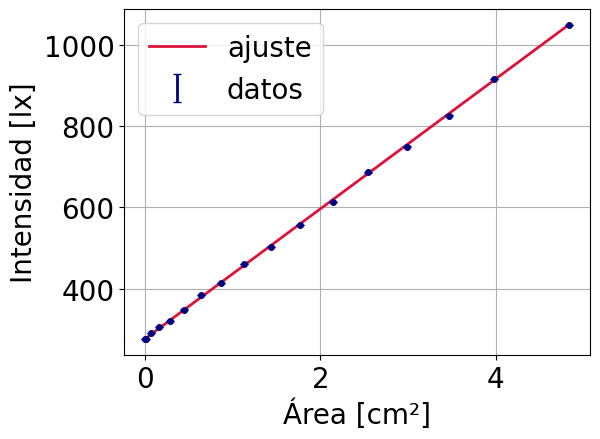

In [47]:
data3 = np.loadtxt('concha diafragma.csv',delimiter=',',unpack=True,skiprows=1)
d,err_d,i3,err_i3 = data3

A = np.pi*(d/2)**2
err_A = np.pi*d*err_d

pars3,cov3 = cf(lineal,A,i3,sigma=err_i3,absolute_sigma=True)
a3,b3 = pars3
x_adj3 = np.linspace(min(A),max(A),100)
y_adj3 = lineal(x_adj3,a3,b3)

print(chi2_red(i3,err_i3,A,lineal,pars3))
print(r2(i3,A,lineal,pars3))

plt.plot(x_adj3,y_adj3,'crimson',label='ajuste',zorder=1)
plt.errorbar(A,i3,yerr=err_i3,fmt='None',ecolor='Navy',label='datos',zorder=2)
plt.scatter(A,i3,c='Navy',zorder=3)
plt.grid()
plt.xlabel('Área [cm²]')
plt.ylabel('Intensidad [lx]')
plt.legend()
plt.savefig('diafragma.png')